In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# The dataset looks like this
calls_data = pd.read_csv("../input/911.csv")
calls_data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [5]:
calls_data['zip'].head()

0    19525.0
1    19446.0
2    19401.0
3    19401.0
4        NaN
Name: zip, dtype: float64

In [6]:
calls_data['twp'].head()

0          NEW HANOVER
1    HATFIELD TOWNSHIP
2           NORRISTOWN
3           NORRISTOWN
4     LOWER POTTSGROVE
Name: twp, dtype: object

In [7]:
calls_data['title'].nunique()

141

In [8]:
# Here, we are trying to create a new column, called reasons where we can Identify the reason of calls
# this can be done by splitting the reason from title and adding to 'Reasons'
s = calls_data['title'].apply(lambda x: x.split(':'))
calls_data['Reasons'] = s.apply(lambda x: x[0])
calls_data['Reasons']
calls_data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [9]:
# The count shows that most of the calls have been made for EMS(Emergency Medical services)
calls_data['Reasons'].value_counts()

EMS        208676
Traffic    151458
Fire        63775
Name: Reasons, dtype: int64

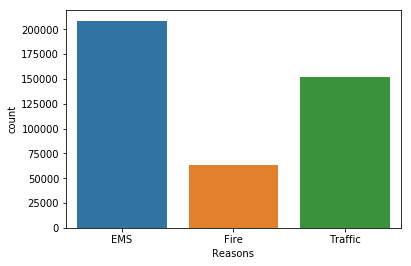

In [10]:
#Plotting the Reasons
sns.countplot(calls_data['Reasons'])

In [11]:
# Here, the timeStamp column is a string, so in order to perfrm the analysis we need to convert it into datetime format
calls_data['timeStamp'] = pd.to_datetime(calls_data['timeStamp'])

In [12]:
# Splitting the timestamp column into hour, month and dayofweek columns
calls_data['hour'] = calls_data['timeStamp'].apply(lambda x: x.hour)
calls_data['hour']

calls_data['month'] = calls_data['timeStamp'].apply(lambda x: x.month)
calls_data['month']

dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
s= calls_data['timeStamp'].apply(lambda x: x.dayofweek)
calls_data['day of week'] = s.map(dmap)


calls_data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons,hour,month,day of week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thu


In [13]:
# We can see that, most of the calls recorder are on friday.
bydays = calls_data.groupby('day of week')
bydays.count()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons,hour,month
day of week,,,,,,,,,,,,
Fri,65751,65751,65751,57650,65751,65751,65720,65751,65751,65751,65751,65751
Mon,61318,61318,61318,53928,61318,61318,61303,61318,61318,61318,61318,61318
Sat,57093,57093,57093,49788,57093,57093,57069,57093,57093,57093,57093,57093
Sun,50124,50124,50124,43834,50124,50124,50103,50124,50124,50124,50124,50124
Thu,63159,63159,63159,55479,63159,63159,63139,63159,63159,63159,63159,63159
Tue,63041,63041,63041,55244,63041,63041,63018,63041,63041,63041,63041,63041
Wed,63423,63423,63423,55857,63423,63423,63398,63423,63423,63423,63423,63423


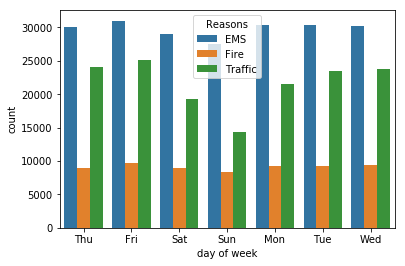

In [14]:
# By plotting the calls reasons with the days of the week, we can observe that most of the calls are during friday.
sns.countplot(calls_data['day of week'],hue = calls_data['Reasons'])

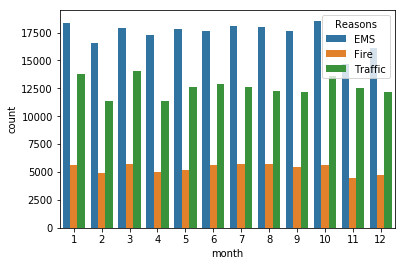

In [15]:
# By plotting the calls reasons with the month, we can observe that most of the calls are during the LAst three months
sns.countplot(calls_data['month'],hue = calls_data['Reasons'])

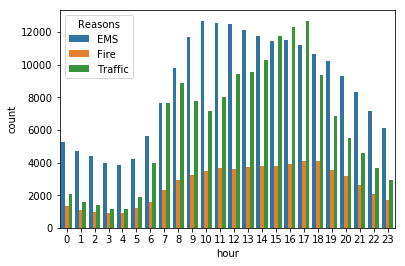

In [16]:
# By plotting the calls reasons with the hour, we can observe that most of the calls are during evening hours
sns.countplot(calls_data['hour'],hue = calls_data['Reasons'])

In [17]:
bymonth = calls_data.groupby('month').count()
bymonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons,hour,day of week
month,,,,,,,,,,,,
1,37824,37824,37824,33480,37824,37824,37812,37824,37824,37824,37824,37824
2,32828,32828,32828,28963,32828,32828,32817,32828,32828,32828,32828,32828
3,37666,37666,37666,33416,37666,37666,37651,37666,37666,37666,37666,37666
4,33583,33583,33583,29488,33583,33583,33575,33583,33583,33583,33583,33583
5,35644,35644,35644,31114,35644,35644,35628,35644,35644,35644,35644,35644
6,36171,36171,36171,31501,36171,36171,36152,36171,36171,36171,36171,36171
7,36405,36405,36405,31863,36405,36405,36391,36405,36405,36405,36405,36405
8,35972,35972,35972,31512,35972,35972,35957,35972,35972,35972,35972,35972
9,35339,35339,35339,30772,35339,35339,35325,35339,35339,35339,35339,35339


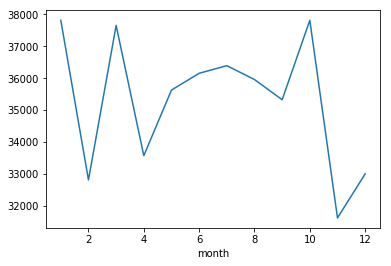

In [18]:
bymonth['twp'].plot()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


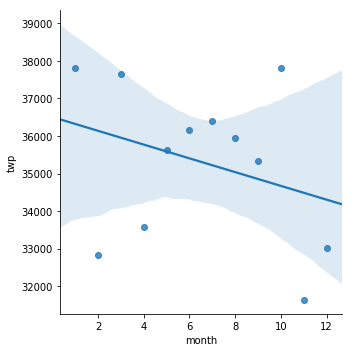

In [19]:
# Linear map to show the by month data of calls, we can see that the plot is scattered.
sns.lmplot(x='month',y='twp',data=bymonth.reset_index())

In [20]:
calls_data['date'] = calls_data['timeStamp'].apply(lambda x: x.date())
calls_data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons,hour,month,day of week,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thu,2015-12-10


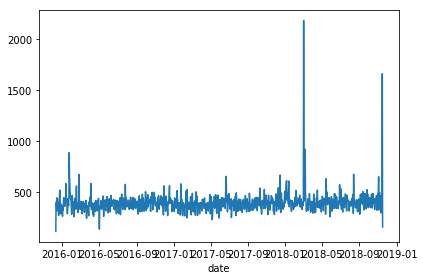

In [21]:
bydate = calls_data.groupby('date').count()['twp'].plot()
plt.tight_layout()

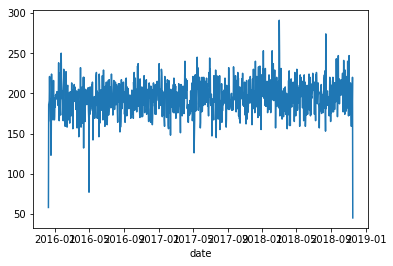

In [22]:
calls_data[calls_data['Reasons'] == 'EMS'].groupby('date').count()['twp'].plot()

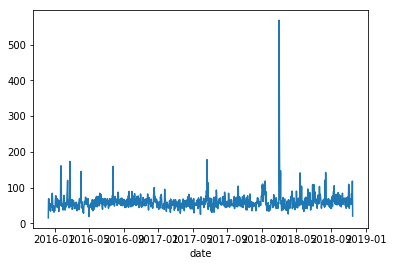

In [23]:
calls_data[calls_data['Reasons'] == 'Fire'].groupby('date').count()['twp'].plot()

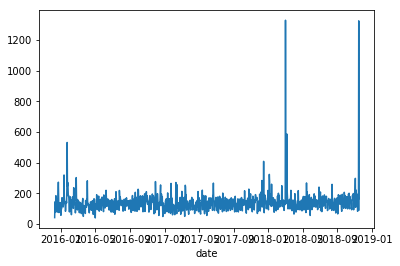

In [24]:
calls_data[calls_data['Reasons'] == 'Traffic'].groupby('date').count()['twp'].plot()

In [25]:
dayhour = calls_data.groupby(by=['day of week','hour']).count()['Reasons'].unstack()
dayhour.head()

hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
day of week,,,,,,,,,,,,,,,,,,,,,,,,
Fri,1185,1001,930,832,821,1051,1676,2689,3185,3295,3494,3667,3879,4002,4150,4514,4711,4489,3616,3254,2789,2445,2210,1866
Mon,1207,974,857,784,871,1124,1729,2829,3588,3685,3422,3600,3752,3571,3547,3975,4063,4003,3512,2821,2418,2005,1698,1283
Sat,1515,1332,1206,1012,936,985,1230,1640,2211,2766,3119,3428,3544,3524,3479,3284,3348,3274,3174,3036,2632,2432,2073,1913
Sun,1520,1331,1263,1033,954,941,1119,1568,1933,2421,2776,2787,3078,2887,2992,2828,2855,2872,2829,2679,2362,1994,1632,1470
Thu,1115,873,920,775,784,1091,1801,2913,3468,3457,3533,3514,3796,4031,3904,4139,4053,4412,3578,2923,2579,2230,1784,1486


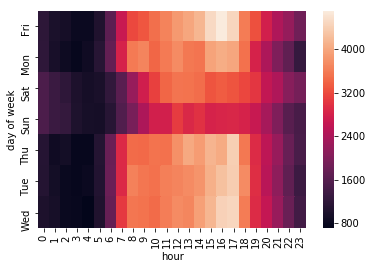

In [26]:
sns.heatmap(dayhour)

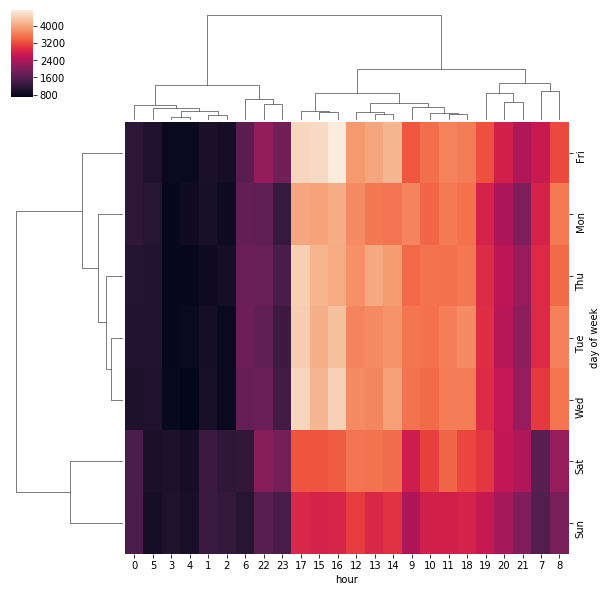

In [27]:
sns.clustermap(dayhour)

In [28]:
daymonth = calls_data.groupby(by=['day of week','month']).count()['Reasons'].unstack()
daymonth.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
day of week,,,,,,,,,,,,
Fri,5532,4848,7344,5195,4989,5867,5380,5312,6010,5179,4525,5570
Mon,5716,5214,4663,5154,5019,5045,5792,5212,4675,6385,4157,4286
Sat,5103,4431,4914,4947,4275,4868,4883,4355,5023,5051,4043,5200
Sun,4882,3806,3569,4628,3940,4019,5114,3963,4245,4852,3210,3896
Thu,4985,4708,6010,4637,5469,5951,4954,5328,5300,4940,5978,4899


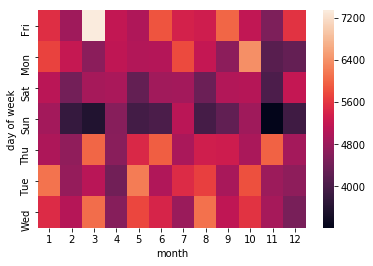

In [29]:
sns.heatmap(daymonth)

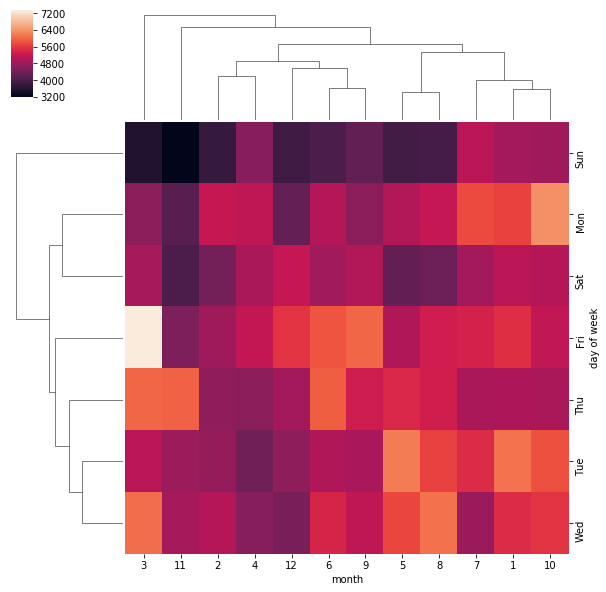

In [30]:
sns.clustermap(daymonth)